In [12]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt


## Goal
The goal in this notebook is to go from an screenshot image of a TEPPEN deck to being able to extract images for the indivitual cards

In [8]:
im = cv2.imread("Decks/2020_03/IMG_4902.png",0)
h,w = im.shape
print(h,w)

1125 2436


Starting with viewing the image to see what we need to do.

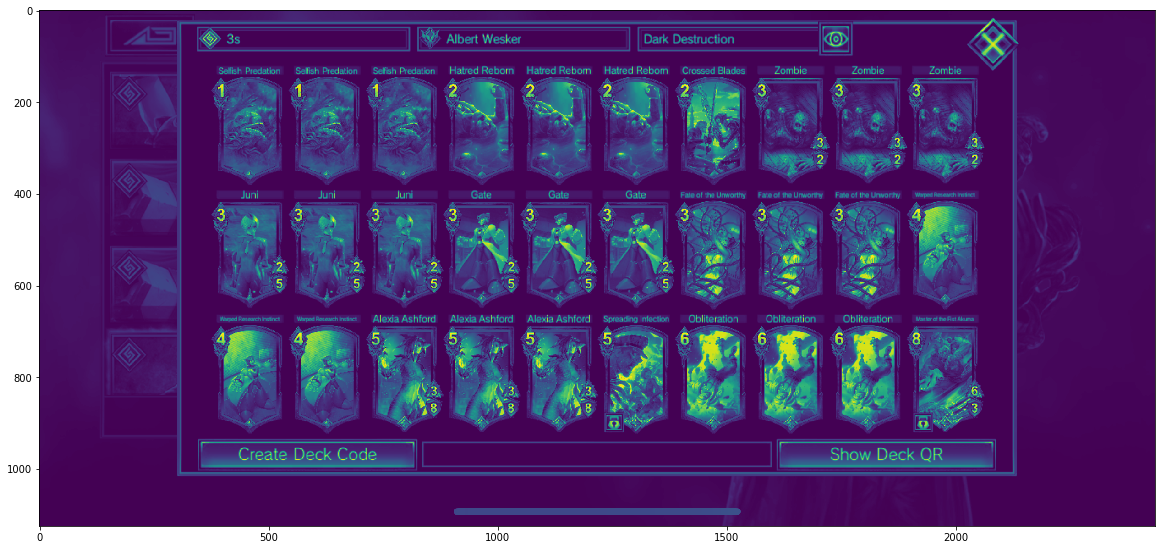

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(im)

plt.show()

Trying out Edge Detect to see if its useful. Not really...

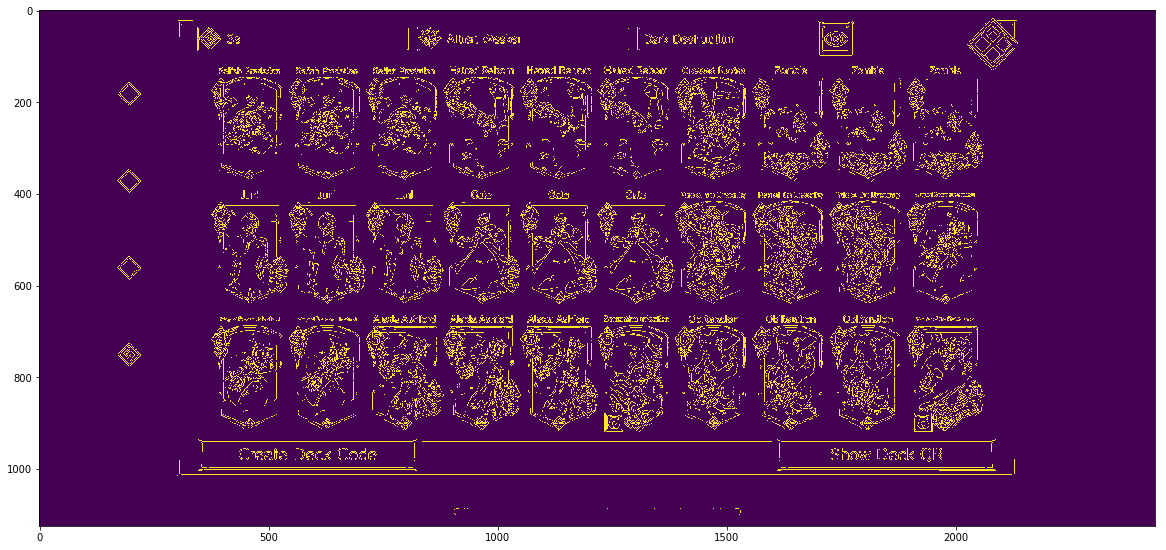

In [20]:
edges = cv2.Canny(im, 100, 200)
plt.figure(figsize=(20,20))
plt.imshow(edges)
plt.show()

Thresholding and filtering is usually really helpful. We can see blobs representing cards pretty easily now.

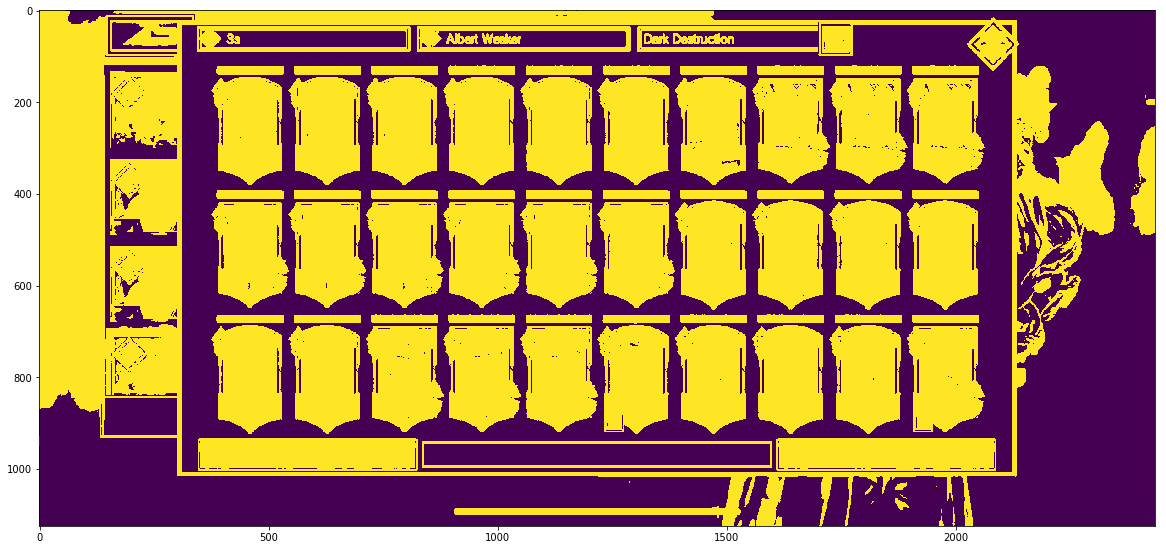

In [44]:
a, thres = cv2.threshold(im, 5, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(20,20))
plt.imshow(thres)
plt.show()

Using contours to find those blobs and their centers. Drawing centers with Dots. Waaaay too many contours to do anything. We'll have to simplify that.

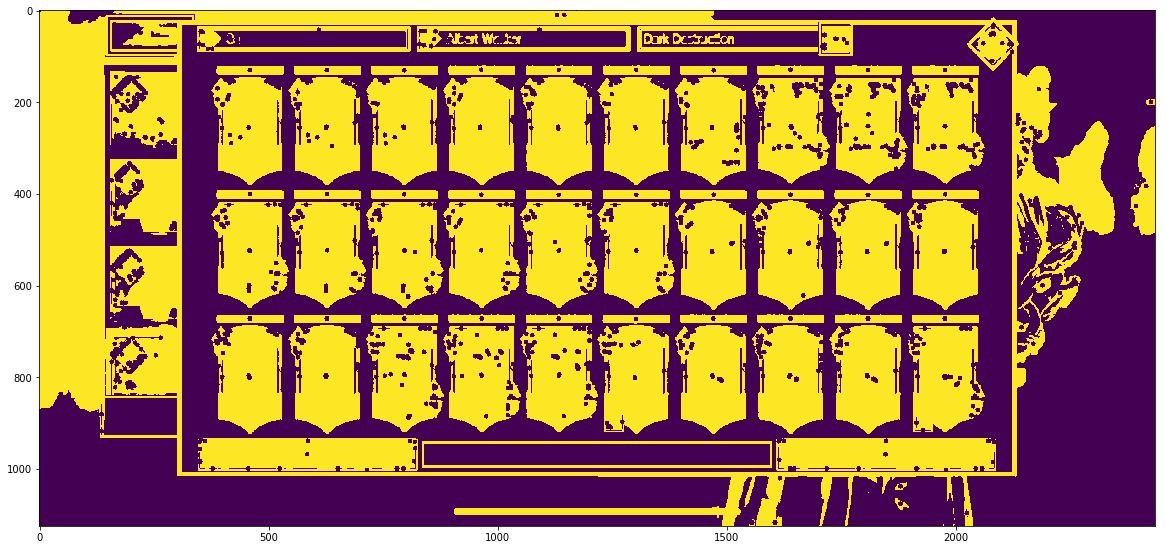

In [47]:
im2, contours, h = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    M = cv2.moments(c)
    if M['m00'] !=0:
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
    else:
        cX,cY = 0,0
    cv2.circle(im2, (cX,cY), 5, (0,0,0),-1)
plt.figure(figsize=(20,20))
plt.imshow(im2)
plt.show()

Filter contours by limiting smallest size helps us single out the cards. But there are still some contours we don't want mainly the places where "Show QR code" go, and the border. The easiest way is to crop these out

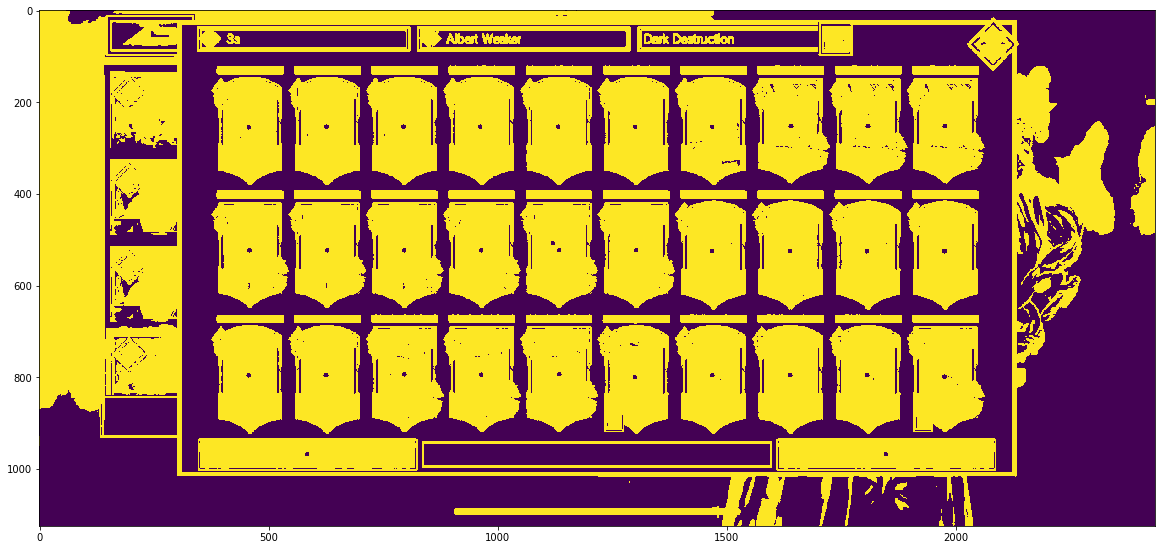

In [68]:
a, thres = cv2.threshold(im, 5, 255, cv2.THRESH_BINARY)
im2, contours, h = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if cv2.contourArea(c) < 10000:
        continue
    M = cv2.moments(c)
    if M['m00'] !=0:
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
    else:
        cX,cY = 0,0
    cv2.circle(thres, (cX,cY), 5, (0,0,0),-1)
plt.figure(figsize=(20,20))
plt.imshow(thres)
plt.show()

Added a percentage based crop, and drew bounding rectangles around the contour centers. Transposed this onto the original image to see if this will be useful for image extraction.

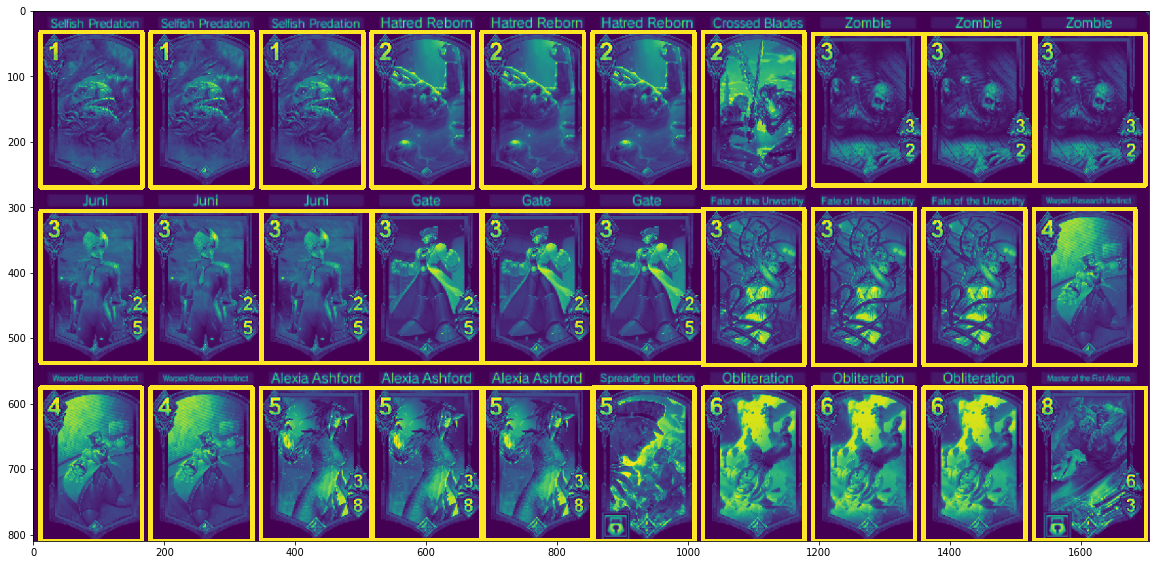

In [78]:
im = cv2.imread("Decks/2020_03/IMG_4902.png",0)
h,w = im.shape
crop = im.copy()[int(h*0.1):int(h*0.82), int(w*0.15):int(w*0.85)]
a, thres = cv2.threshold(crop, 5, 255, cv2.THRESH_BINARY)
im2, contours, h = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if cv2.contourArea(c) < 10000:
        continue
    M = cv2.moments(c)
    if M['m00'] !=0:
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
    else:
        cX,cY = 0,0
    cv2.circle(im2, (cX,cY), 5, (0,0,0),-1)
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(crop, (x,y), (x+w,y+h), (255,0,0),5)
plt.figure(figsize=(20,20))
plt.imshow(crop)
plt.show()

Looking good! 

But it is a bit reliant on the crop. Will want to revisit this if different devices screen shots have non linear dimensions. We could probably look at another crop based on the border between deck and background. For now we can 

## Next Steps: 
Extracting card names to create training data
Extract Hero and Hero art

I expect these to be a little difficult, but the process will be similar.